In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Set the default figure size
matplotlib.rcParams['figure.figsize'] = (12, 8)




# Your analysis and plotting code goes here



In [28]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\swiggy_file.csv')

In [29]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar
...,...,...,...,...,...,...,...,...,...,...
140652,Yummy Momo'S Cafe,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,"20% OFF UPTO ₹50\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Yavatmal Locality,Yes,Yavatmal
140653,CAFE FIRST FLOOR,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,₹150 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [30]:
# Check for missing data
print(df.isnull().sum())


Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64


In [31]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [32]:
df['Average Price'] = df['Average Price'].str.extract(r'(\d+)').astype(float)

In [33]:
# Identify unique non-numeric entries in 'Rating'
non_numeric_ratings = df['Rating'][~df['Rating'].astype(str).str.replace('.', '', regex=False).str.isdigit()]
print("Non-numeric entries in 'Rating':")
print(non_numeric_ratings.unique())

# Identify unique non-numeric entries in 'Average Price'
non_numeric_prices = df['Average Price'][~df['Average Price'].astype(str).str.replace('.', '', regex=False).str.isdigit()]
print("\nNon-numeric entries in 'Average Price':")
print(non_numeric_prices.unique())


Non-numeric entries in 'Rating':
[nan]

Non-numeric entries in 'Average Price':
[]


In [34]:
correlation = df['Rating'].corr(df['Average Price'])
print(f"\nCorrelation between Rating and Average Price: {correlation}")


Correlation between Rating and Average Price: 0.0628024106454221


In [35]:
# Method - 2
# Cuisine Popularity by Region
# Clean dataset
df_clean = df[['Location', 'Cuisine']].dropna()
df_clean

,Location,Cuisine
0,Abohar,"Pizzas, Pastas"
1,Abohar,"Indian, North Indian"
2,Abohar,"Italian, Beverages"
3,Abohar,"Pizzas, Burgers"
4,Abohar,"Fast Food, Snacks"
...,...,...
140652,Yavatmal,"Chinese, Fast Food"
140653,Yavatmal,"Beverages, Snacks"
140654,Yavatmal,Snacks
140655,Yavatmal,"North Indian, Biryani"


In [36]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

Restaurant Name          0
Cuisine                 27
Rating               33719
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64
Restaurant Name       object
Cuisine               object
Rating               float64
Number of Ratings     object
Average Price        float64
Number of Offers       int64
Offer Name            object
Area                  object
Pure Veg              object
Location              object
dtype: object


In [37]:
df_clean = df[['Location', 'Cuisine']].dropna()



In [38]:
# Split the 'Cuisine' column by comma and explode
df['Cuisine'] = df['Cuisine'].str.split(',')
df = df.explode('Cuisine')

# Trim spaces after splitting
df['Cuisine'] = df['Cuisine'].str.strip()


In [39]:
df

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,Pizzas,4.0,10+ ratings,250.0,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
0,La Pino'Z Pizza,Pastas,4.0,10+ ratings,250.0,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,Indian,3.6,50+ ratings,250.0,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
1,The Second Wife,North Indian,3.6,50+ ratings,250.0,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,Italian,3.8,10+ ratings,200.0,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
...,...,...,...,...,...,...,...,...,...,...
140653,CAFE FIRST FLOOR,Snacks,3.2,3 ratings,200.0,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal City,Yes,Yavatmal
140654,Cafe Coffee Aani Barach Kahi,Snacks,3.2,50+ ratings,150.0,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,Yes,Yavatmal
140655,Patil Family Restaurant,North Indian,4.3,9 ratings,200.0,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal
140655,Patil Family Restaurant,Biryani,4.3,9 ratings,200.0,2,"FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500, FLAT ₹50...",Yavatmal Locality,No,Yavatmal


In [40]:

df = df.drop_duplicates()


In [41]:
# Group by Location and Cuisine and count the number of restaurants
city_cuisine_counts = df.groupby(['Location', 'Cuisine']).size().reset_index(name='Count')

# View the aggregated data
print(city_cuisine_counts.head())


  Location    Cuisine  Count
0   Abohar   American      1
1   Abohar     Bakery      2
2   Abohar  Beverages     11
3   Abohar    Burgers      4
4   Abohar       Cafe      2


In [42]:
# Total restaurants per city
total_restaurants = df.groupby('Location').size().reset_index(name='Total')

# Merge with city_cuisine_counts to calculate proportions
city_cuisine_counts = city_cuisine_counts.merge(total_restaurants, on='Location')

# Calculate the proportion of each cuisine per city
city_cuisine_counts['Proportion'] = city_cuisine_counts['Count'] / city_cuisine_counts['Total'] * 100

# View the updated DataFrame
print(city_cuisine_counts)


       Location       Cuisine  Count  Total  Proportion
0        Abohar      American      1     86    1.162791
1        Abohar        Bakery      2     86    2.325581
2        Abohar     Beverages     11     86   12.790698
3        Abohar       Burgers      4     86    4.651163
4        Abohar          Cafe      2     86    2.325581
...         ...           ...    ...    ...         ...
15414  Yavatmal        Snacks     18    154   11.688312
15415  Yavatmal  South Indian      8    154    5.194805
15416  Yavatmal   Street Food      3    154    1.948052
15417  Yavatmal        Sweets      2    154    1.298701
15418  Yavatmal       Tandoor      2    154    1.298701

[15419 rows x 5 columns]


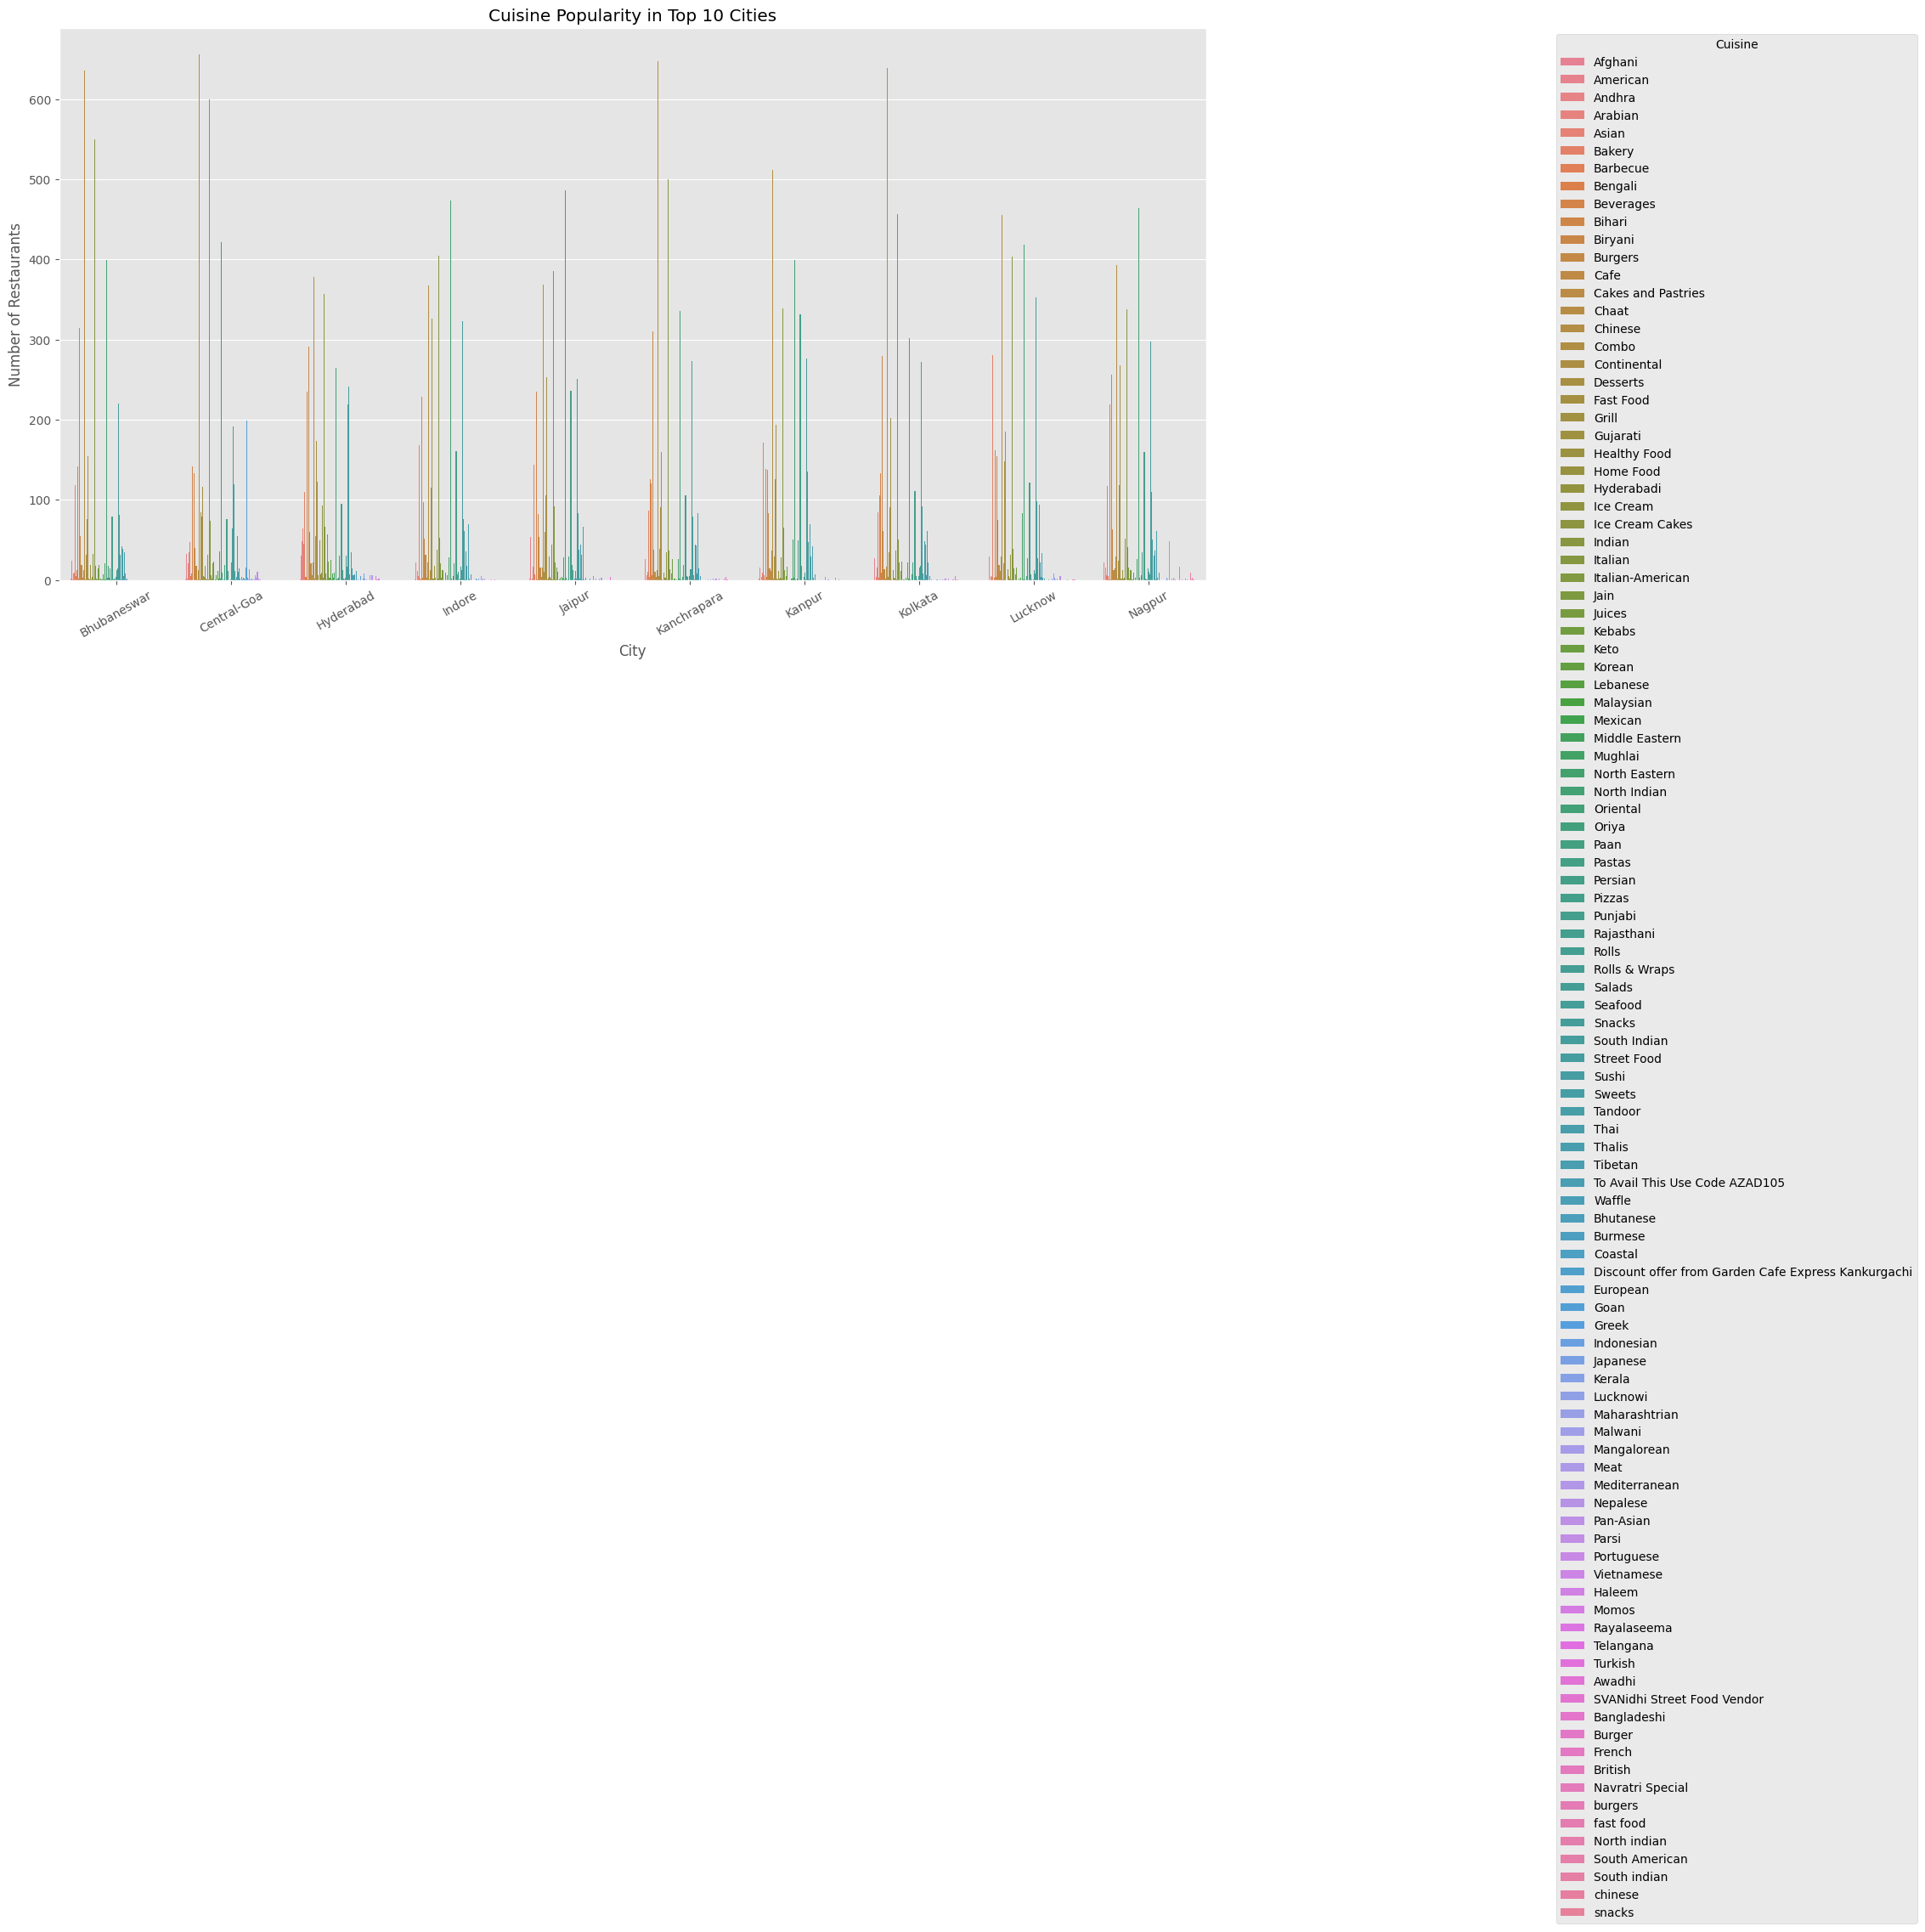

In [43]:
# Get top 10 cities with the most restaurants
top_cities = total_restaurants.sort_values(by='Total', ascending=False).head(10)['Location']

# Filter data for top cities
top_city_cuisine = city_cuisine_counts[city_cuisine_counts['Location'].isin(top_cities)]

# Plot bar chart
plt.figure(figsize=(18, 10))  # Increase figure size for better layout

sns.barplot(x='Location', y='Count', hue='Cuisine', data=top_city_cuisine)
plt.xticks(rotation=30)  # Reduce rotation angle for x-axis labels
plt.title('Cuisine Popularity in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')

# Adjust legend placement to avoid overlap
plt.legend(title='Cuisine', bbox_to_anchor=(1.3, 1), loc='upper left')

# Manually adjust layout to provide more space
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.25)

plt.show()

In [29]:
# # Check for missing values
# print(df.isnull().sum())

# # Fill or drop missing values as appropriate
# df.dropna(subset=['latitude', 'longitude', 'rating'], inplace=True)

# # Convert ratings to numeric if they are not already
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_19620\696836678.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_restaurant_count.index, y=city_restaurant_count.values,hue=None, palette="viridis")


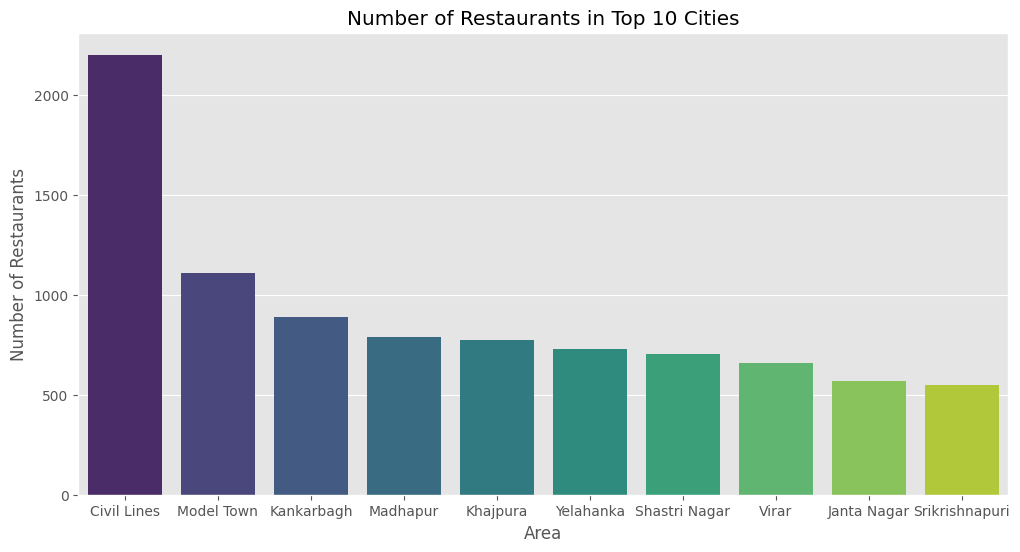

C:\Users\DELL\AppData\Local\Temp\ipykernel_19620\696836678.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.index, y=avg_price_city.values,hue=None, palette="coolwarm")


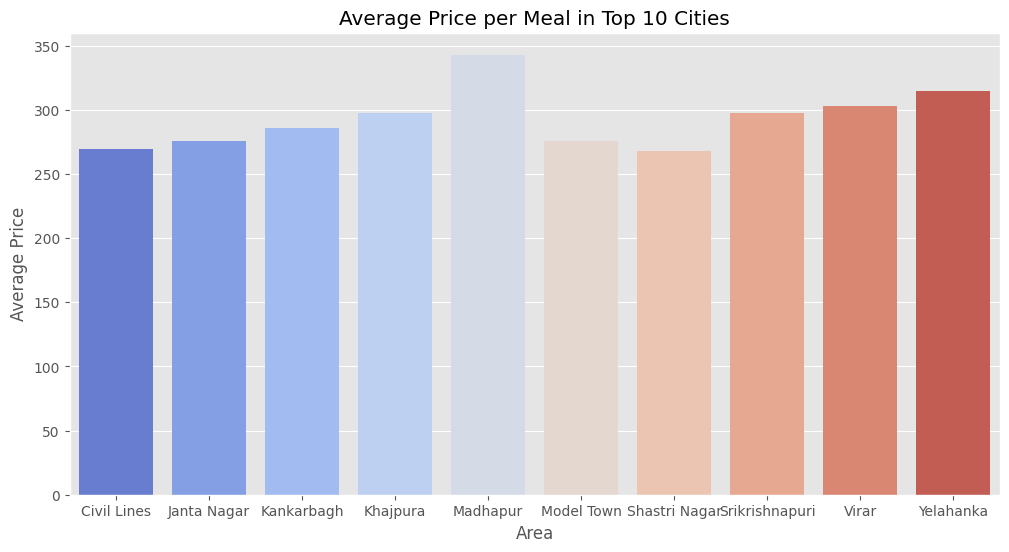

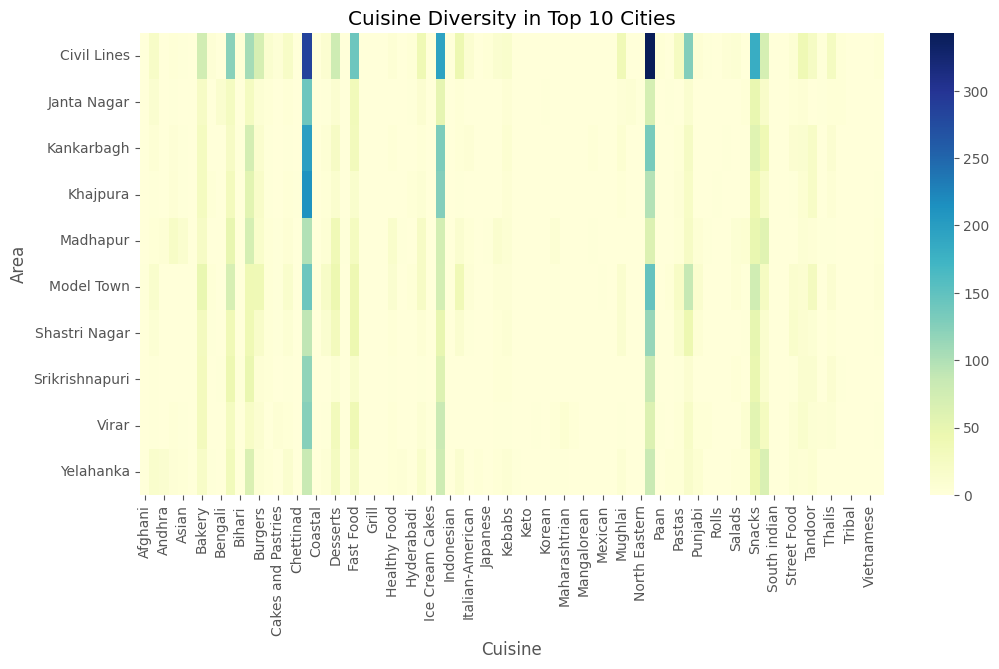

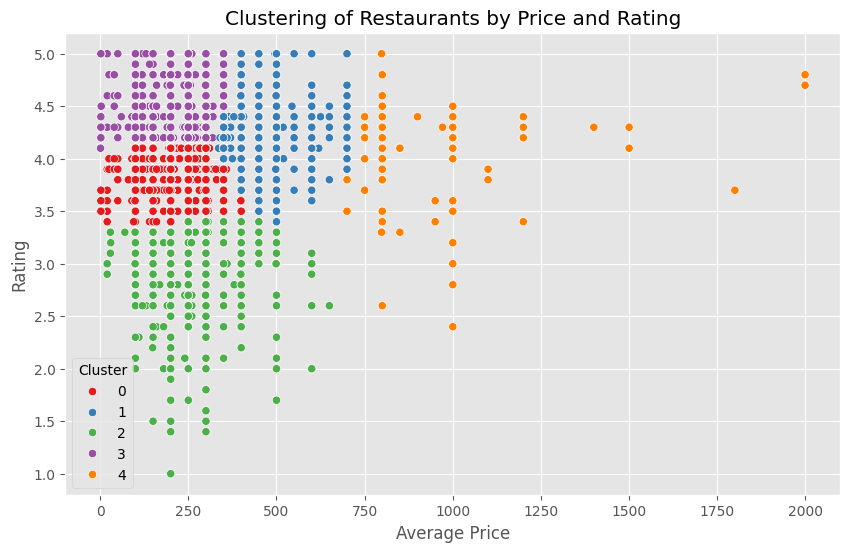

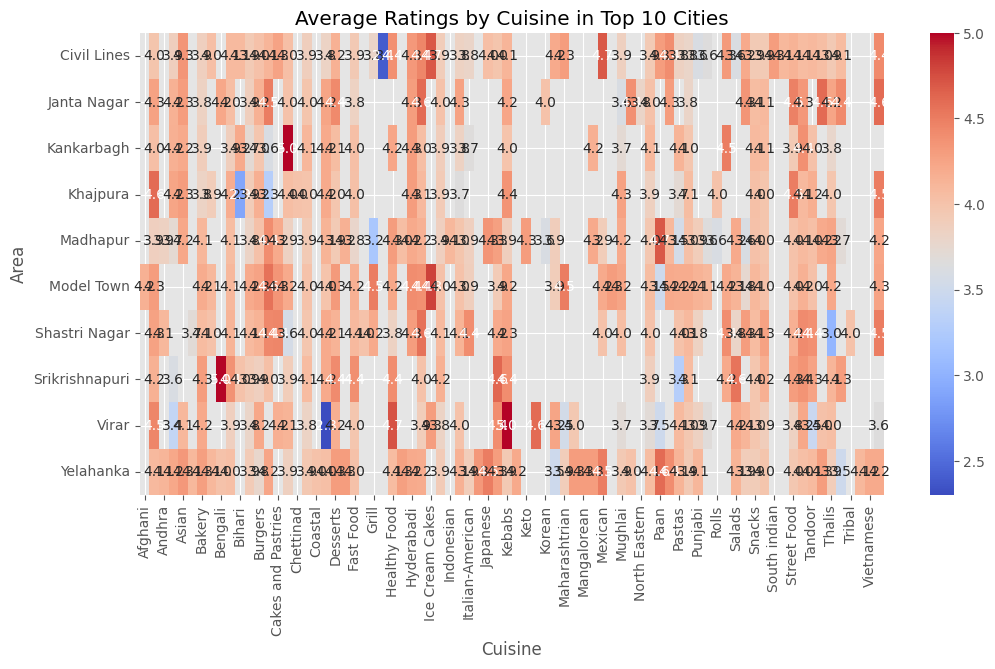

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Data Preprocessing
# Filter top 10 cities based on the number of restaurants
top_cities = df['Area'].value_counts().head(10).index
top_city_data = df[df['Area'].isin(top_cities)]

# Drop any rows with missing data in important columns (optional)
top_city_data = top_city_data.dropna(subset=['Cuisine', 'Average Price', 'Rating'])

# Analysis: Restaurant Density in Each City
city_restaurant_count = top_city_data['Area'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_restaurant_count.index, y=city_restaurant_count.values,hue=None, palette="viridis")
plt.title('Number of Restaurants in Top 10 Cities')
plt.xlabel('Area')
plt.ylabel('Number of Restaurants')
plt.legend([],[], frameon=False)  # Suppress legend
plt.show()

# Analysis: Average Price in Each City
avg_price_city = top_city_data.groupby('Area')['Average Price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values,hue=None, palette="coolwarm")
plt.title('Average Price per Meal in Top 10 Cities')
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.legend([],[], frameon=False)  # Suppress legend
plt.show()

# Cuisine Analysis in Each City
cuisine_counts = top_city_data.groupby(['Area', 'Cuisine']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(cuisine_counts, cmap='YlGnBu', annot=False)
plt.title('Cuisine Diversity in Top 10 Cities')
plt.xlabel('Cuisine')
plt.ylabel('Area')
plt.show()

# Clustering Analysis: Price and Ratings Segmentation
clustering_data = top_city_data[['Average Price', 'Rating']]
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
top_city_data['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_city_data['Average Price'], y=top_city_data['Rating'], hue=top_city_data['cluster'], palette='Set1')
plt.title('Clustering of Restaurants by Price and Rating')
plt.xlabel('Average Price')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()

# Cuisine Performance: Average Ratings by Cuisine in Each City
top_cuisines_ratings = top_city_data.groupby(['Area', 'Cuisine'])['Rating'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(top_cuisines_ratings, cmap="coolwarm", annot=True, fmt=".1f")
plt.title('Average Ratings by Cuisine in Top 10 Cities')
plt.xlabel('Cuisine')
plt.ylabel('Area')
plt.show()
